Grabcut implementation, Not very optimal for our use

In [6]:
# import the necessary packages
import numpy as np
import argparse
import time
import cv2
import os
import matplotlib.pyplot as plt

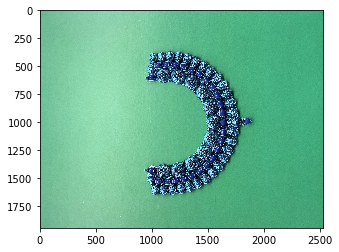

In [7]:
# load the input image from disk and then allocate memory for the
# output mask generated by GrabCut -- this mask should hae the same
# spatial dimensions as the input image
image = cv2.imread("green chain.jpeg")
mask = np.zeros(image.shape[:2], dtype="uint8")
plt.imshow(image)

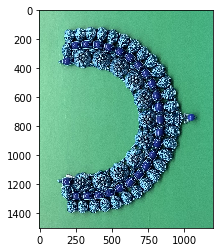

In [8]:
image.shape
im = image[250:1750 , 800:2000]
plt.imshow(im)

In [9]:
# define the bounding box coordinates that approximately define my
# face and neck region (i.e., all visible skin)
rect = (800, 250, 1200, 1500)

In [ ]:
# allocate memory for two arrays that the GrabCut algorithm internally
# uses when segmenting the foreground from the background
fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")
# apply GrabCut using the the bounding box segmentation method
start = time.time()
(mask, bgModel, fgModel) = cv2.grabCut(image, mask, rect, bgModel,
    fgModel, iterCount=10, mode=cv2.GC_INIT_WITH_RECT)  #set def iter 10
end = time.time()
print("[INFO] applying GrabCut took {:.2f} seconds".format(end - start))

[INFO] showing mask for 'Definite Background'
[INFO] showing mask for 'Probable Background'
[INFO] showing mask for 'Definite Foreground'
[INFO] showing mask for 'Probable Foreground'


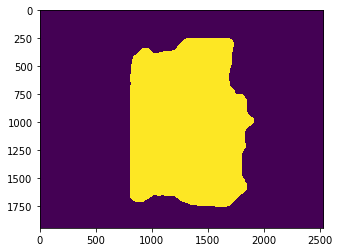

In [34]:
# the output mask has for possible output values, marking each pixel
# in the mask as (1) definite background, (2) definite foreground,
# (3) probable background, and (4) probable foreground
values = (("Definite Background", cv2.GC_BGD),
          ("Probable Background", cv2.GC_PR_BGD),
          ("Definite Foreground", cv2.GC_FGD),
          ("Probable Foreground", cv2.GC_PR_FGD),
)
# loop over the possible GrabCut mask values
for (name, value) in values:
    # construct a mask that for the current value
    print("[INFO] showing mask for '{}'".format(name))
    valueMask = (mask == value).astype("uint8") * 255
    # display the mask so we can visualize it
#     cv2.imshow(name, valueMask)
#     cv2.waitKey(0)
    plt.imshow(valueMask)

In [35]:
# we'll set all definite background and probable background pixels
# to 0 while definite foreground and probable foreground pixels are
# set to 1
outputMask = np.where((mask == cv2.GC_BGD) | (mask == cv2.GC_PR_BGD),
                      0, 1)
# scale the mask from the range [0, 1] to [0, 255]
outputMask = (outputMask * 255).astype("uint8")
# apply a bitwise AND to the image using our mask generated by
# GrabCut to generate our final output image
output = cv2.bitwise_and(image, image, mask=outputMask)

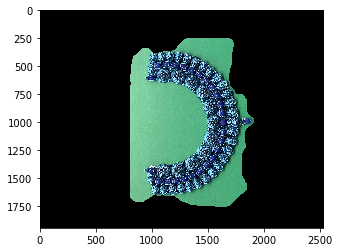

In [36]:
plt.imshow(output)